In [15]:
import pandas as pd
import numpy as np

## Get the dataset

In [16]:
df2016 = pd.read_excel('./datasets/dispatch2016.xlsx', sheet_name='Sheet1')
df2017 = pd.read_excel('/media/win/Users/tim/Desktop/dispatch2017.xls.xlsx')

In [17]:
# The following code can be used to read a DataFrame in the ".xls" file from CVAC (AKA a fucking .html file).
df = pd.read_html('/home/tim/Downloads/Report.xls', skiprows=1)[0]
df.columns = ['Date', 'Time', 'Verified Address', 'Message']

In [18]:
df2017.drop(columns=['Verified Address'], inplace=True)

In [19]:
df2016['Type of Call'] = df2016['Type of call']
df2016.drop(columns=['Unnamed: 0', 'Type', 'Call Category', 'Time of day', 'Type of call'], inplace=True)

In [20]:
df = pd.concat([df2016, df2017])

In [21]:
# Make the index a datetime using the existing date and time columns
df.set_index(
    df.apply(lambda row: 
         pd.datetime(row['Date'].year, 
            row['Date'].month, 
            row['Date'].day, 
            row['Time'].hour, 
            row['Time'].minute, 
            row['Time'].second), axis=1), inplace=True)
df.drop(columns=['Date', 'Time'], inplace=True)

In [22]:
df.reset_index()

,index,Message,Type of Call
0,2016-01-01 02:20:48,118 ALLEN PL CHAPPAQUA: @TRAIN - CHAPPAQUA (PL...,EDP
1,2016-01-01 08:41:53,"BEDFORD RD/KITTLE RD CHAPPAQUA, Cross: BEDFORD...",MVA
2,2016-01-01 19:09:35,"9 CRYSTAL SPRING RD NEW_CASTLE, Cross: QUAKER ...",Weakness/general malaise
3,2016-01-02 01:18:47,"11 KITTLE RD CHAPPAQUA: @KITTLE HOUSE INN, Cro...",Weakness/general malaise
4,2016-01-02 05:41:06,58 TOUCHSTONE WAY NEW_CASTLE: @PHEASANT RUN CO...,AMS
5,2016-01-02 10:45:33,"75 S GREELEY AVE CHAPPAQUA: @WELLS FARGO BANK,...",Unknown medical
6,2016-01-02 19:24:52,"33 JOAN DR NEW_CASTLE, Cross: SLEEPY HOLLOW RD...",Medical
7,2016-01-03 06:10:07,90 SAW MILL RIVER RD NEW_CASTLE: @ECHO LAKE GR...,Seizure
8,2016-01-05 05:32:58,116 STONE BRIDGE SQ CHAPPAQUA: @OLD FARM LAKE ...,Seizure
9,2016-01-05 16:21:08,"1 S GREELEY AVE CHAPPAQUA:I/F/O, Cross: QUAKER...",Fall/injuries


In [7]:

df = df.reset_index().rename(columns={'index': 'Datetime'})
df.dropna(inplace=True)

In [20]:
labels = df.loc[:, 'Type of Call'].unique()
X = df.loc[:, 'Message']
y = df.loc[:, 'Type of Call']

## Build the Model

In [11]:
from sklearn.base import TransformerMixin
from nltk.stem import PorterStemmer
import enchant

class TextNormalizer(TransformerMixin):
    def __init__(self, dict_name='en_US', pwl_file=None):
        self.dict_name = dict_name
        self.pwl_file = pwl_file
        
        if self.pwl_file:
            self.dict_ = enchant.DictWithPWL(self.dict_name, pwl=self.pwl_file)
        else:
            self.dict_ = enchant.Dict(self.dict_name)
            
        self.dict_no_pwl_ = enchant.Dict(self.dict_name)
        self.porter_ = PorterStemmer()
        
    def transform_word(self, word):
        if not self.dict_.check(word):
            suggestions = self.dict_.suggest(word)
            if len(suggestions) > 0:
                word = self.dict_.suggest(word)[0]
        elif not self.dict_no_pwl_.check(word):
            pass
        else:
            word = self.porter_.stem(word)
        return word


    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        if self.pwl_file:
            d = enchant.DictWithPWL(self.dict_name, pwl=self.pwl_file)
        else:
            d = enchant.Dict(self.dict_name)
        porter = PorterStemmer()
        return X.apply(self.transform_word)

In [12]:
class StopwordRemover(TransformerMixin):
    def __init__(self, stopwords):
        self.stopwords = stopwords
        
    def filter_stopwords_(self, x):
        words = x.split(' ')
        return ' '.join(word for word in words if word not in self.stopwords)
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.apply(self.filter_stopwords_)

In [61]:
class ProbaLabeler(TransformerMixin):
    def __init__(self, clf, trained_initially=False):
        self.clf = clf
        self.trained_initially = trained_initially
        
    def fit(self, X, y=None):
        if not self.trained_initially:
            self.clf.fit(X, y)
        
    def transform(self, X):
        probas = self.clf.predict_proba(X)
        return probas.max()

In [13]:
def read_stopwords(filename, n=None):
    wds = []
    with open(filename) as f:
        for l in f:
            wds.append(l)
    
    if n:
        wds = wds[:n]
    return set(wds)

In [62]:
from sklearn.pipeline import Pipeline, FeatureUnion
from pipeline_utils.regex_preprocessor import RegexPreprocessor
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from xgboost import XGBClassifier
from nltk.corpus import stopwords
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

stop = set(stopwords.words('english'))
stop = stop.union(read_stopwords('datasets/stopwords.txt', 275))

preprocessor = Pipeline([
    ('regex', RegexPreprocessor('[^a-z ]', ' ')),
    ('stop', StopwordRemover(stop))
])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('vectorizer', CountVectorizer()),
    # ('xgb', XGBClassifier())
    # ('bagger', BaggingClassifier(XGBClassifier(), n_estimators=5))
    ('proba', ProbaLabeler(XGBClassifier()))
])

In [63]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [64]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('preprocessor', Pipeline(memory=None,
     steps=[('regex', <pipeline_utils.regex_preprocessor.RegexPreprocessor object at 0x7fab38090b00>), ('stop', <__main__.StopwordRemover object at 0x7fab38090c88>)])), ('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
...     tokenizer=None, vocabulary=None)), ('proba', <__main__.ProbaLabeler object at 0x7fab381f72e8>)])

## Test the Model

In [65]:
from sklearn.metrics import accuracy_score
pipeline.transform(X_test)

0.99371511

In [24]:
from sklearn.externals import joblib
old_model = joblib.load('models/regex_vectorizer_xgbclassifier.pkl')

In [27]:
y_pred_old = old_model.predict(X_test)

In [28]:
accuracy_score(y_test, y_pred_old)

0.83957219251336901

In [35]:
y_prob = pipeline.predict_proba(X_test)

In [76]:
y_pred.shape

(187,)

In [77]:
y_prob.shape

(187, 24)

In [227]:
Xp = np.concatenate((maxes_correct.values, maxes_incorrect.values))
yp = np.concatenate((np.ones_like(maxes_correct), np.zeros_like(maxes_incorrect)))

In [244]:
from sklearn.svm import SVC
svc = SVC(probability=True)
svc.fit(Xp.reshape(-1, 1), yp)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [249]:
maxes_incorrect.mean()

0.50440568

In [42]:
y_test.head()

752           Stroke
562      Lift assist
314          Cardiac
99              Pain
760    Fall/injuries
Name: Type of Call, dtype: object

In [47]:
y_pred_s = pd.Series(y_pred)
y_pred_s.index = y_test.index
y_pred_s.head()

752           Stroke
562      Lift assist
314          Cardiac
99              Pain
760    Fall/injuries
dtype: object

In [50]:
pd.DataFrame(data=y_prob).set_index(y_test.index)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
752,0.000590,0.000540,0.000957,0.002532,0.000438,0.000463,0.000428,0.001419,0.000432,0.006094,...,0.011747,0.000822,0.004611,0.000294,0.946451,0.002840,0.004630,0.003221,0.004679,0.004910
562,0.000316,0.000393,0.000198,0.001230,0.000188,0.000166,0.000335,0.000558,0.001190,0.007746,...,0.002440,0.000696,0.000663,0.000294,0.000159,0.000914,0.007964,0.000246,0.006856,0.001615
314,0.002103,0.002358,0.012972,0.039401,0.767874,0.001812,0.002242,0.006246,0.001280,0.029442,...,0.048435,0.002188,0.007167,0.000931,0.007422,0.017368,0.001809,0.001868,0.002756,0.038748
99,0.000332,0.000205,0.001471,0.000639,0.000181,0.001607,0.000200,0.000640,0.003033,0.085644,...,0.004004,0.893010,0.000576,0.000227,0.000175,0.000866,0.000608,0.000285,0.003130,0.002185
760,0.000109,0.000141,0.000161,0.000679,0.000086,0.000065,0.000084,0.000285,0.000079,0.992382,...,0.001501,0.000082,0.000224,0.000056,0.000231,0.000652,0.001051,0.000282,0.000718,0.000626
512,0.011842,0.012078,0.005443,0.039801,0.009267,0.005796,0.008049,0.018354,0.011078,0.114615,...,0.260375,0.020749,0.026584,0.006071,0.007182,0.041032,0.050917,0.048069,0.122591,0.125924
201,0.000215,0.000287,0.000170,0.005115,0.000119,0.000183,0.000153,0.000950,0.000693,0.973556,...,0.009694,0.001407,0.001219,0.000123,0.000221,0.001219,0.001208,0.000231,0.000670,0.002021
118,0.000196,0.000115,0.000095,0.000707,0.000111,0.000096,0.000192,0.001890,0.000166,0.002891,...,0.006118,0.000135,0.000446,0.000430,0.000145,0.981020,0.000277,0.000336,0.001023,0.002776
809,0.002569,0.003069,0.002161,0.011413,0.407525,0.005336,0.002203,0.038693,0.001782,0.028370,...,0.404809,0.005115,0.011260,0.001260,0.003486,0.016578,0.011789,0.007598,0.006563,0.020070
167,0.004924,0.004523,0.007645,0.022497,0.014646,0.005009,0.004442,0.014055,0.004345,0.468832,...,0.070411,0.004085,0.018145,0.003245,0.006458,0.034472,0.033569,0.012979,0.074876,0.140724


In [51]:
# preds = pd.concat([pd.Series(y_test), 
#                   pd.Series(y_pred), 
#                   pd.DataFrame(data=y_prob)]) 
                  # axis=1)
# ['actual', 'predicted'] + list(labels)
preds = pd.concat([pd.Series(y_test),
                   y_pred_s,
                   X_test,
                   pd.DataFrame(data=y_prob).set_index(y_test.index)], axis=1)
preds.set_index(y_test.index, inplace=True)
preds.columns = ['actual', 'predicted', 'msg'] + list(labels)
preds.head()

,actual,predicted,msg,EDP,MVA,Weakness/general malaise,AMS,Unknown medical,Medical,Seizure,...,Cardiac,Medic alert,Allergic,Lift assist,Pain,Bleeding,Intox,Diabetic,Assault,Standby
752,Stroke,Stroke,"620 QUAKER ST MILLWOOD: alias 620 QUAKER RD, C...",0.000590,0.000540,0.000957,0.002532,0.000438,0.000463,0.000428,...,0.011747,0.000822,0.004611,0.000294,0.946451,0.002840,0.004630,0.003221,0.004679,0.004910
562,Lift assist,Lift assist,"15 SUZANNE LN NEW_CASTLE, Cross: QUAKER ST, Ty...",0.000316,0.000393,0.000198,0.001230,0.000188,0.000166,0.000335,...,0.002440,0.000696,0.000663,0.000294,0.000159,0.000914,0.007964,0.000246,0.006856,0.001615
314,Cardiac,Cardiac,"91 OLD ROARING BROOK RD NEW_CASTLE, Cross: LAW...",0.002103,0.002358,0.012972,0.039401,0.767874,0.001812,0.002242,...,0.048435,0.002188,0.007167,0.000931,0.007422,0.017368,0.001809,0.001868,0.002756,0.038748
99,Pain,Pain,117 HARDSCRABBLE LAKE DR MT_PLEASANT: @HARDSCR...,0.000332,0.000205,0.001471,0.000639,0.000181,0.001607,0.000200,...,0.004004,0.893010,0.000576,0.000227,0.000175,0.000866,0.000608,0.000285,0.003130,0.002185
760,Fall/injuries,Fall/injuries,"375 MILLWOOD RD NEW_CASTLE, Cross: ORCHARD DR,...",0.000109,0.000141,0.000161,0.000679,0.000086,0.000065,0.000084,...,0.001501,0.000082,0.000224,0.000056,0.000231,0.000652,0.001051,0.000282,0.000718,0.000626


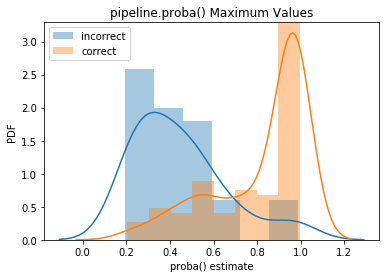

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

maxes_incorrect = preds[ preds['actual'] != preds['predicted'] ] \
    .loc[:, 'EDP':] \
    .max(axis=1)
    
maxes_correct = preds[ preds['actual'] == preds['predicted'] ] \
    .loc[:, 'EDP':] \
    .max(axis=1)
    
maxes = preds \
    .loc[:, 'EDP':] \
    .max(axis=1)
    
sns.distplot(maxes_incorrect, label='incorrect')
sns.distplot(maxes_correct, label='correct')

plt.title('pipeline.proba() Maximum Values')

plt.ylabel('PDF')
plt.xlabel('proba() estimate')

plt.legend()
plt.show()

In [200]:
maxes_correct.sort_values()

74     0.212309
318    0.242696
214    0.268251
24     0.268328
351    0.273430
133    0.297925
232    0.300642
97     0.314962
36     0.315830
378    0.316209
328    0.445796
299    0.449229
160    0.457008
365    0.472203
106    0.483185
21     0.525575
119    0.527933
302    0.557460
307    0.558167
139    0.559822
190    0.564587
177    0.579480
440    0.582387
317    0.631037
385    0.636429
504    0.636903
253    0.646879
29     0.650724
98     0.668996
28     0.688725
         ...   
12     0.985080
227    0.985161
291    0.985178
307    0.985661
92     0.986148
187    0.987273
109    0.987721
526    0.987767
531    0.987997
44     0.988439
49     0.988884
209    0.988970
306    0.989012
350    0.989135
261    0.989144
16     0.989783
139    0.990504
267    0.990712
15     0.990834
333    0.991193
464    0.992122
334    0.992445
493    0.993040
311    0.993708
338    0.993740
523    0.993750
211    0.994187
396    0.994244
123    0.995878
119    0.997821
Length: 151, dtype: floa

In [203]:
preds.iloc[74, :]

actual                        Bleeding
predicted                     Bleeding
EDP                          0.0020364
MVA                         0.00450119
Weakness/general malaise    0.00325054
AMS                           0.728367
Unknown medical             0.00128269
Medical                     0.00144318
Seizure                      0.0021427
Fall/injuries               0.00479965
Syncope                     0.00131804
Unresponsive                 0.0282198
Difficulty breathing         0.0130756
Stroke                      0.00132945
Chest pain                  0.00151436
Unspecified                  0.0011707
Cardiac                      0.0241491
Medic alert                 0.00392504
Allergic                    0.00974853
Lift assist                 0.00166216
Pain                        0.00302628
Bleeding                     0.0116877
Intox                        0.0191209
Diabetic                    0.00536867
Assault                       0.110756
Standby                  

In [197]:
preds[96]

KeyError: 96

In [192]:
len(maxes_correct[ maxes_correct >]) / len(maxes_correct)

0.9006622516556292

In [188]:
len(maxes_incorrect[ maxes_incorrect < 0.9 ]) / len(maxes_incorrect)

0.9444444444444444

In [ ]:
sns.

In [178]:
maxes_incorrect.describe()

count    36.000000
mean      0.504406
std       0.250610
min       0.187191
25%       0.278216
50%       0.440178
75%       0.736502
max       0.989651
dtype: float64

In [117]:
y_pred.shape

(187,)

In [69]:
predictions = pd.DataFrame(data=np.array([y_test, y_pred, X_test]).T, columns=['test', 'pred', 'text'])
predictions.head()

,test,pred,text
0,Difficulty breathing,Difficulty breathing,"9 FOX DEN RD NEW_CASTLE, Cross: INDIAN HILL RD..."
1,MVA,MVA,NEW_CASTLE: @SMRP NB 22.1 SOUTH OF (EXIT 33-RO...
2,Difficulty breathing,Difficulty breathing,77 FURTHER LN CHAPPAQUA: @OLD FARM LAKE COMPLE...
3,MVA,Fall/injuries,SAW MILL RIVER RD/HIDDEN HOLLOW LN NEW_CASTLE:...
4,Medical,Medical,"7 KILLINGTON ST CHAPPAQUA, Cross: STORNOWAYE S..."


In [49]:
incorrect = predictions[predictions['test'] != predictions['pred']].reset_index(drop=True)

sample = incorrect.iloc[0].loc['text']
pipeline.predict_proba(pd.Series([sample]))[0]

array([ 0.15012272,  0.00913136,  0.02519547,  0.01815945,  0.00515007,
        0.02328652,  0.01129753,  0.07586356,  0.00638761,  0.07811879,
        0.06188028,  0.00630249,  0.00555415,  0.00576631,  0.04628607,
        0.01030274,  0.00969574,  0.00535113,  0.00625689,  0.07059962,
        0.01179441,  0.05327877,  0.03353878,  0.27067956], dtype=float32)

In [157]:
def print_probs(x, print_msg=False, clf=pipeline):
    probs = clf.predict_proba([x])[0]
    if(print_msg):
        print(x)
    for label, p in sorted(zip(clf.named_steps['xgb'].classes_, probs), key=lambda t: t[1], reverse=True):
        print('{:24} {:6f}'.format(label, p))

In [311]:
feature_importances = pd.Series(rnd_clf.feature_importances_, index=countvec_X.get_feature_names())
feature_importances['score'] = rnd_clf.feature_importances_

In [312]:
feature_importances

ab                                                            0
abd                                                 0.000196861
abdominal                                            0.00451619
abdominasl                                          0.000205238
abilities                                                     0
ability                                             0.000344863
abnormal                                            0.000487996
abort                                               0.000366426
access                                              0.000128715
accident                                            0.000304093
across                                              0.000172715
activated                                           0.000190146
activation                                          0.000543249
active                                              0.000448315
acura                                               0.000194693
additional                              

In [259]:
y_pred = rnd_clf.predict(X_test)

In [6]:
from collections import defaultdict
words = defaultdict(lambda: 0.)
for msg in msgs:
    for w in msg.split(' '):
        words[w] += 1

NameError: name 'msgs' is not defined

In [295]:
counts_by_label = defaultdict(lambda: defaultdict(lambda: 0))
for msg, lbl in df.loc[:, ['Message', 'Type of call']].values:
    for word in msg.split(' '):
        counts_by_label[lbl][word] += 1

In [313]:
count_ratios = pd.DataFrame(index=words.keys())
count_ratios['importance'] = feature_importances
count_ratios['total'] = pd.Series(words)
for label in types.unique():
    series = pd.Series(counts_by_label[label])
    count_ratios[label] = series / count_ratios['total']
count_ratios.fillna(0., inplace=True)

In [315]:
count_ratios.sort_values(by='importance', ascending=False)

,importance,total,EDP,MVA,Weakness/general malaise,AMS,Unknown medical,Medical,Seizure,Fall/injuries,...,Cardiac,Medic alert,Allergic,Lift assist,Pain,Bleeding,Intox,Diabetic,Assault,Standby
fall,0.035397,75.0,0.000000,0.013333,0.000000,0.013333,0.000000,0.000000,0.000000,0.920000,...,0.000000,0.013333,0.000000,0.013333,0.000000,0.013333,0.000000,0.000000,0.000000,0.000000
mva,0.027516,70.0,0.000000,0.885714,0.000000,0.000000,0.000000,0.000000,0.028571,0.028571,...,0.000000,0.000000,0.000000,0.000000,0.057143,0.000000,0.000000,0.000000,0.000000,0.000000
pain,0.019949,57.0,0.000000,0.035088,0.052632,0.000000,0.000000,0.000000,0.000000,0.017544,...,0.017544,0.000000,0.000000,0.000000,0.614035,0.000000,0.000000,0.000000,0.000000,0.000000
syncope,0.019330,22.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
injury,0.019107,40.0,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.850000,...,0.000000,0.000000,0.000000,0.000000,0.025000,0.000000,0.000000,0.000000,0.000000,0.000000
injuries,0.018669,80.0,0.000000,0.712500,0.000000,0.000000,0.012500,0.000000,0.025000,0.212500,...,0.000000,0.000000,0.000000,0.000000,0.012500,0.000000,0.000000,0.000000,0.025000,0.000000
als,0.016609,365.0,0.013699,0.000000,0.082192,0.035616,0.027397,0.073973,0.057534,0.208219,...,0.049315,0.000000,0.030137,0.000000,0.063014,0.030137,0.002740,0.021918,0.008219,0.000000
edp,0.015185,21.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
diff,0.013310,30.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
rd,0.012104,536.0,0.035448,0.160448,0.082090,0.014925,0.022388,0.061567,0.046642,0.154851,...,0.041045,0.011194,0.013060,0.020522,0.050373,0.018657,0.003731,0.011194,0.005597,0.000000


In [57]:
enUS = enchant.Dict('en_US')
enUS.check('st')

True

In [322]:
count_ratios2 = count_ratios.drop(columns=['importance', 'total'])

In [331]:
count_ratios.sort_values(by='importance', ascending=False)

,importance,total,EDP,MVA,Weakness/general malaise,AMS,Unknown medical,Medical,Seizure,Fall/injuries,...,Cardiac,Medic alert,Allergic,Lift assist,Pain,Bleeding,Intox,Diabetic,Assault,Standby
fall,0.035397,75.0,0.000000,0.013333,0.000000,0.013333,0.000000,0.000000,0.000000,0.920000,...,0.000000,0.013333,0.000000,0.013333,0.000000,0.013333,0.000000,0.000000,0.000000,0.000000
mva,0.027516,70.0,0.000000,0.885714,0.000000,0.000000,0.000000,0.000000,0.028571,0.028571,...,0.000000,0.000000,0.000000,0.000000,0.057143,0.000000,0.000000,0.000000,0.000000,0.000000
pain,0.019949,57.0,0.000000,0.035088,0.052632,0.000000,0.000000,0.000000,0.000000,0.017544,...,0.017544,0.000000,0.000000,0.000000,0.614035,0.000000,0.000000,0.000000,0.000000,0.000000
syncope,0.019330,22.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
injury,0.019107,40.0,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.850000,...,0.000000,0.000000,0.000000,0.000000,0.025000,0.000000,0.000000,0.000000,0.000000,0.000000
injuries,0.018669,80.0,0.000000,0.712500,0.000000,0.000000,0.012500,0.000000,0.025000,0.212500,...,0.000000,0.000000,0.000000,0.000000,0.012500,0.000000,0.000000,0.000000,0.025000,0.000000
als,0.016609,365.0,0.013699,0.000000,0.082192,0.035616,0.027397,0.073973,0.057534,0.208219,...,0.049315,0.000000,0.030137,0.000000,0.063014,0.030137,0.002740,0.021918,0.008219,0.000000
edp,0.015185,21.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
diff,0.013310,30.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
rd,0.012104,536.0,0.035448,0.160448,0.082090,0.014925,0.022388,0.061567,0.046642,0.154851,...,0.041045,0.011194,0.013060,0.020522,0.050373,0.018657,0.003731,0.011194,0.005597,0.000000


In [71]:
from sklearn.externals import joblib
joblib.dump(pipeline, 'models/regex_vectorizer_xgbclassifier.pkl')

['models/regex_vectorizer_xgbclassifier.pkl']

In [66]:
april2017 = pd.read_csv('datasets/april2017.csv', header=[1])